# Does health expenditure depend on economic status or education level?


## Environment Setup


In [228]:
import matplotlib as mpl
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_theme(
    style="ticks",
    font="Verdana",
    palette=sns.color_palette("pastel")[2:],
    context="paper",
)

mpl.rcParams["figure.dpi"] = 300

df = pd.read_csv("../dataset/clean.csv")

## Health Expenditure and Economic Status


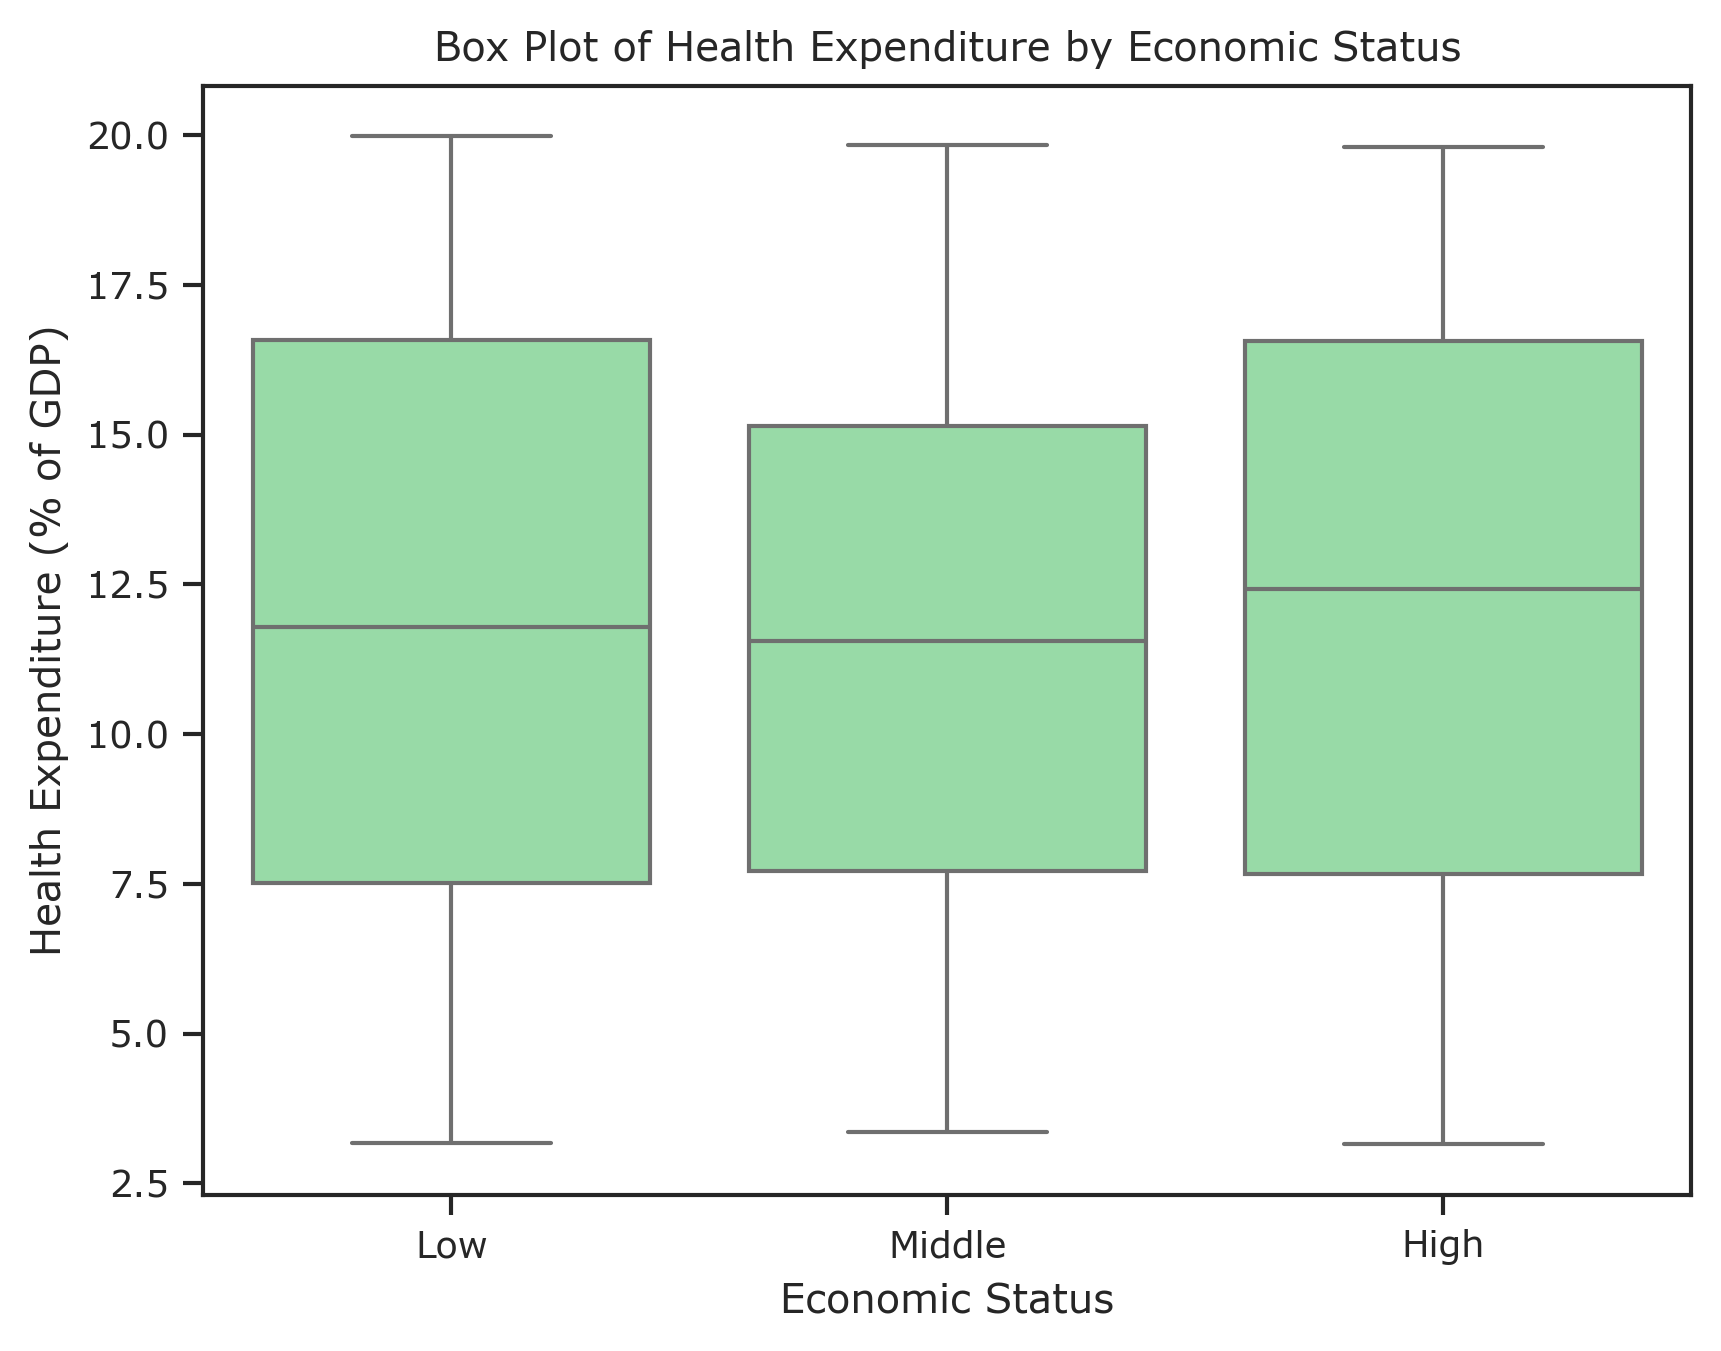

In [229]:
avg_health_expenditure = (
    df.groupby("economic_status")["health_expenditure_gdp"].mean().reset_index()
)

sns.boxplot(
    x="economic_status",
    y="health_expenditure_gdp",
    data=df,
    order=["Low", "Middle", "High"],
)

plt.title("Box Plot of Health Expenditure by Economic Status")
plt.xlabel("Economic Status")
plt.ylabel("Health Expenditure (% of GDP)")

plt.show()

## Health Expenditure and Education Level


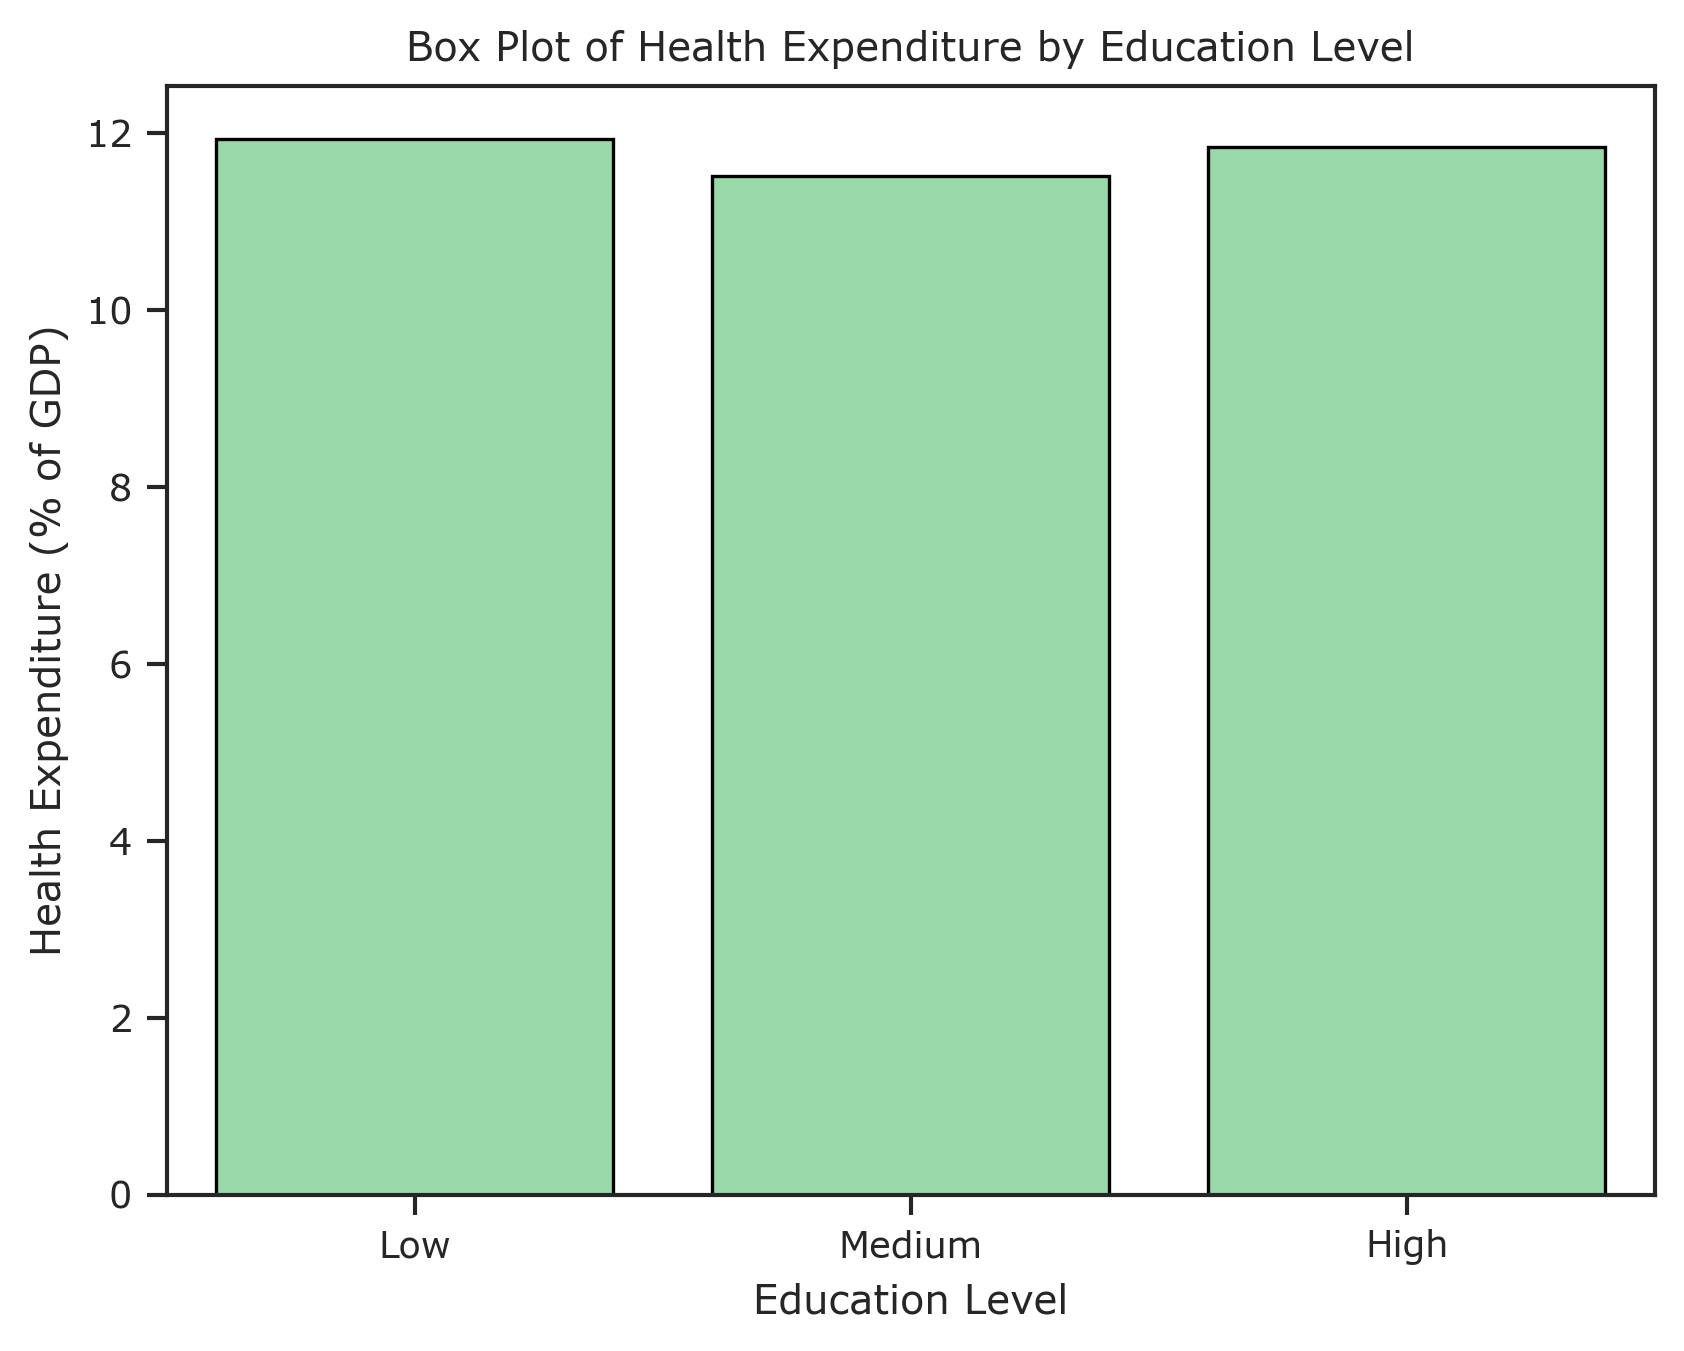

In [230]:
avg_health_expenditure = (
    df.groupby("education_level")["health_expenditure_gdp"].mean().reset_index()
)

sns.barplot(
    x="education_level",
    y="health_expenditure_gdp",
    data=avg_health_expenditure,
    order=["Low", "Medium", "High"],
    errorbar=None,
    edgecolor="black",
)

plt.title("Box Plot of Health Expenditure by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Health Expenditure (% of GDP)")

plt.show()

## Average Health Expenditure by Year


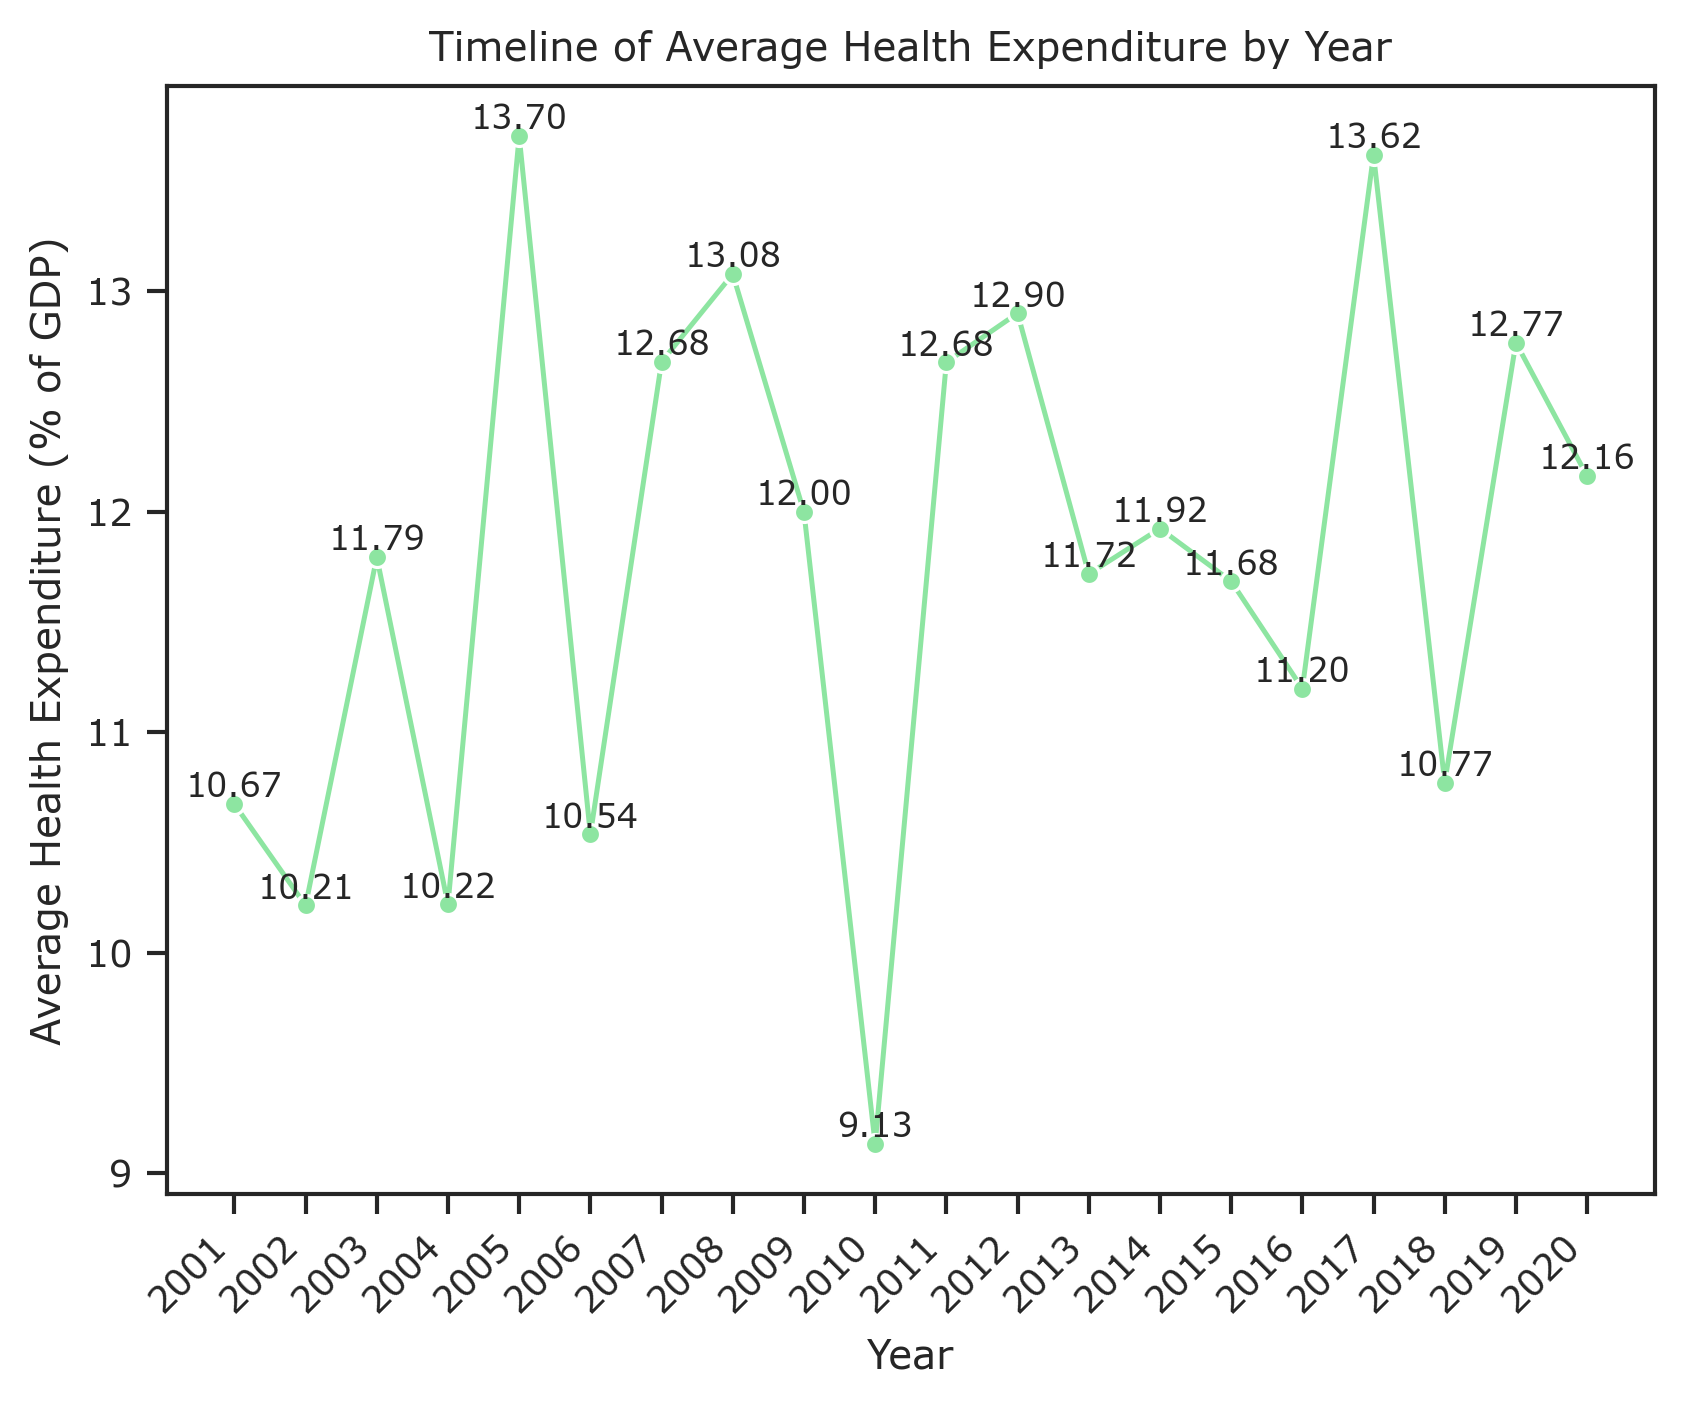

In [231]:
avg_health_expenditure_yearly = (
    df.groupby("year")["health_expenditure_gdp"].mean().reset_index()
)

sns.lineplot(
    x="year", y="health_expenditure_gdp", data=avg_health_expenditure_yearly, marker="o"
)
plt.xticks(avg_health_expenditure_yearly["year"], rotation=45, ha="right")

for x, y in zip(
    avg_health_expenditure_yearly["year"],
    avg_health_expenditure_yearly["health_expenditure_gdp"],
    strict=True,
):
    plt.text(x, y, f"{y:.2f}", ha="center", va="bottom", fontsize=8)

plt.title("Timeline of Average Health Expenditure by Year")
plt.xlabel("Year")
plt.ylabel("Average Health Expenditure (% of GDP)")

plt.show()

## Economic Status Distribution by Year


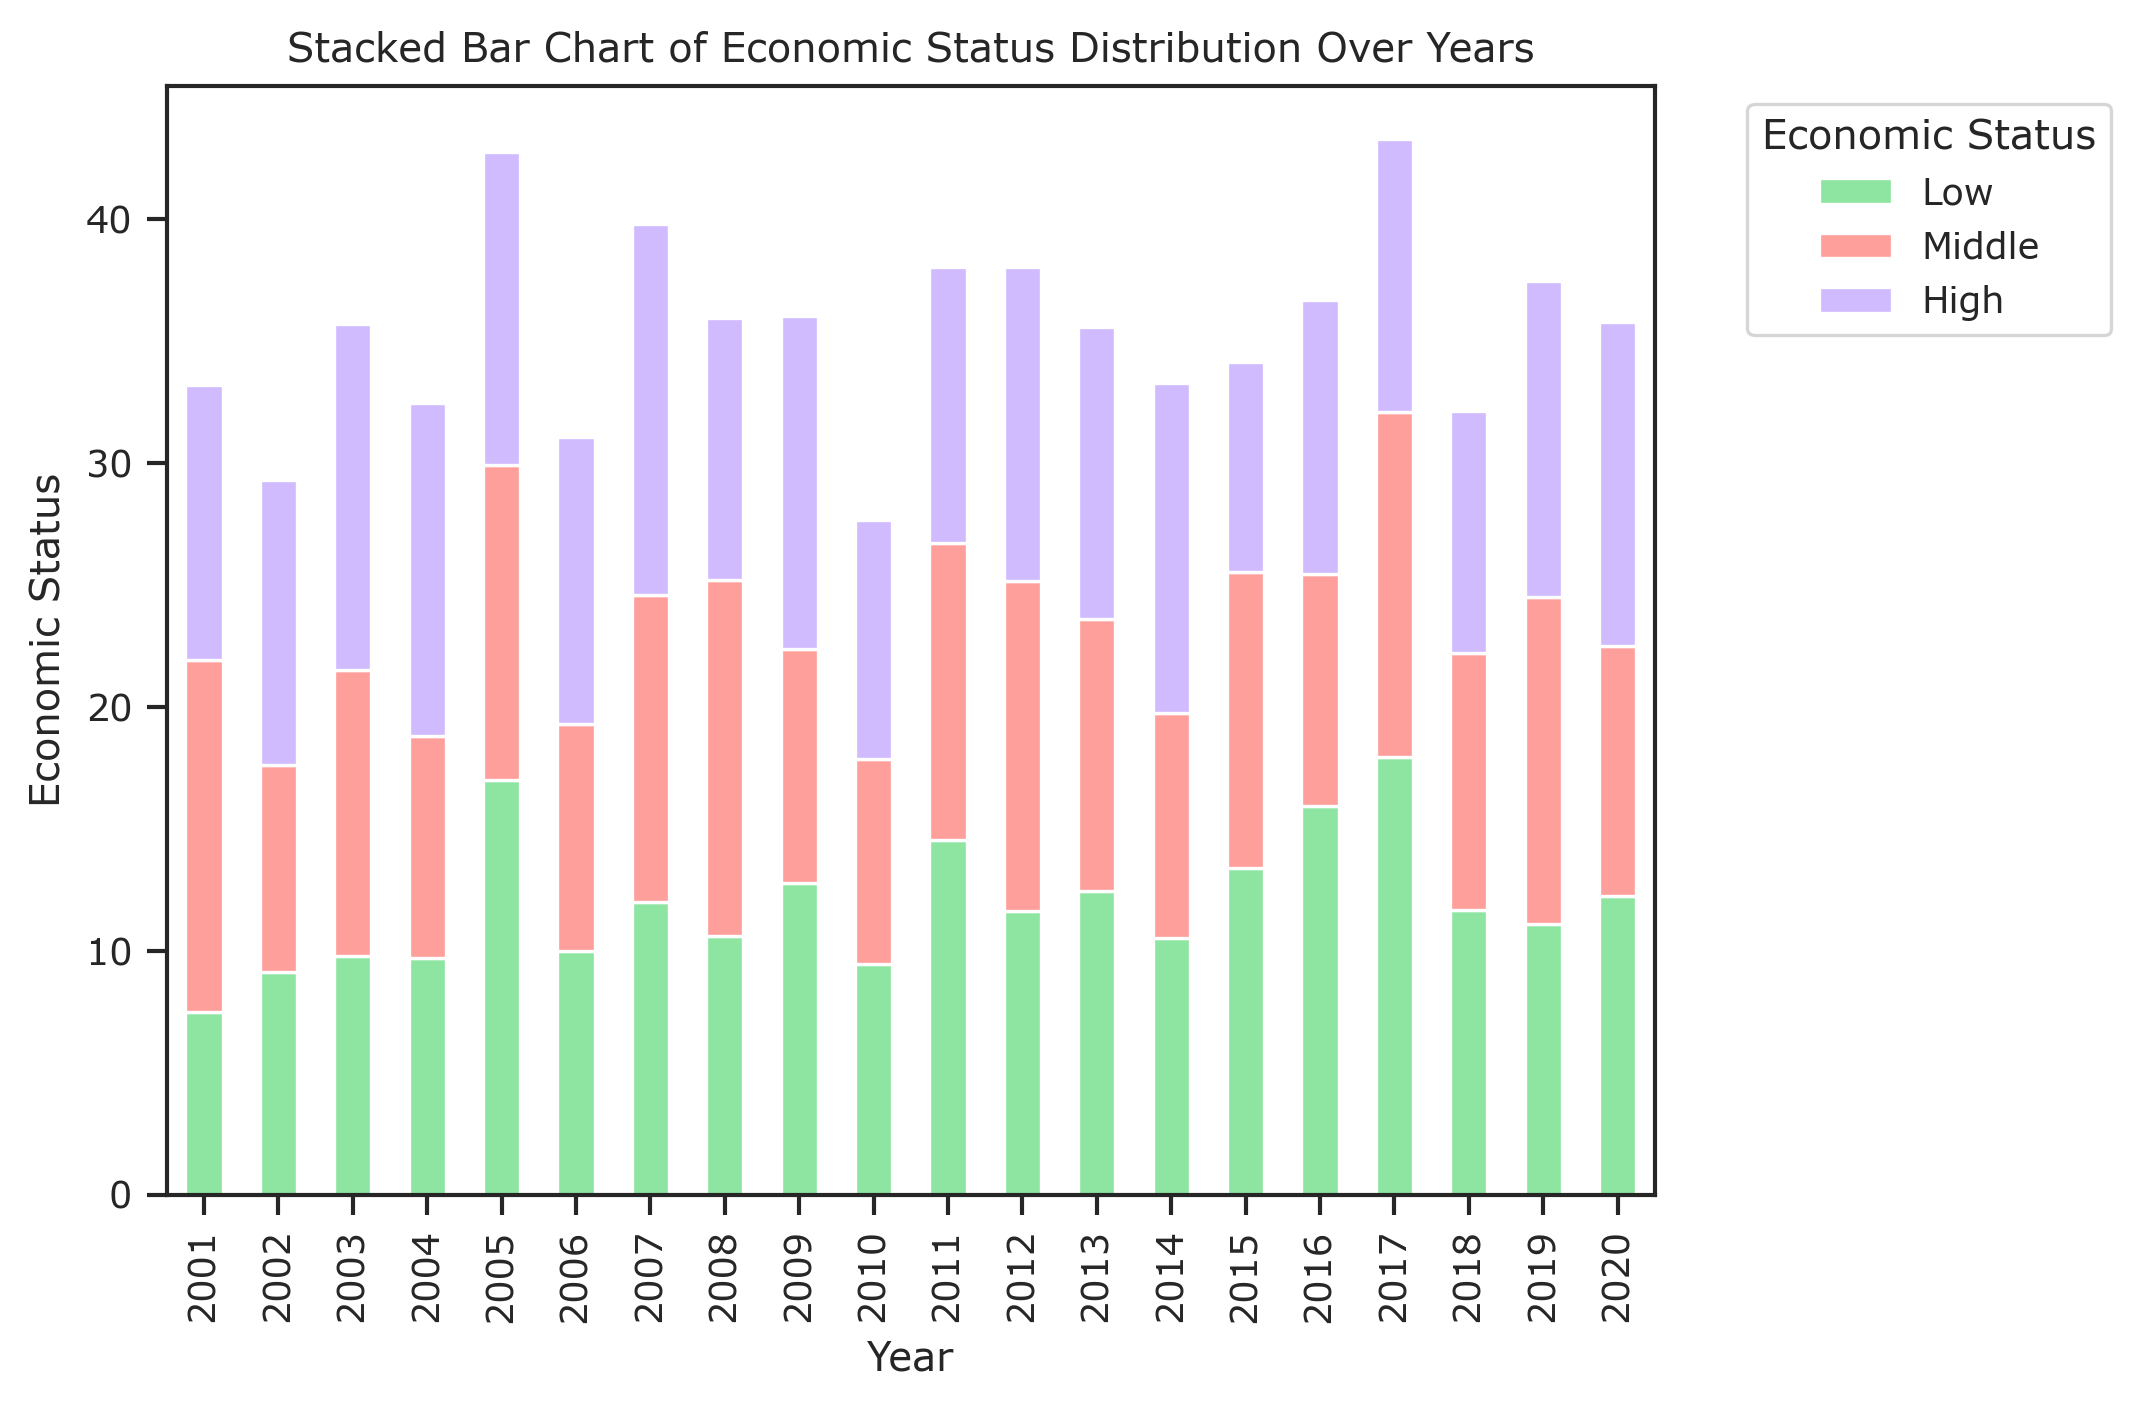

In [235]:
pivot_df = df.pivot_table(
    index="year",
    columns=["economic_status"],
    values="health_expenditure_gdp",
    aggfunc="mean",
)

pivot_df[["Low", "Middle", "High"]].plot(kind="bar", stacked=True)

plt.title("Stacked Bar Chart of Economic Status Distribution Over Years")
plt.xlabel("Year")
plt.ylabel("Economic Status")
plt.legend(title="Economic Status", bbox_to_anchor=(1.05, 1), loc="upper left")

plt.show()

## Education Level Distribution by Year


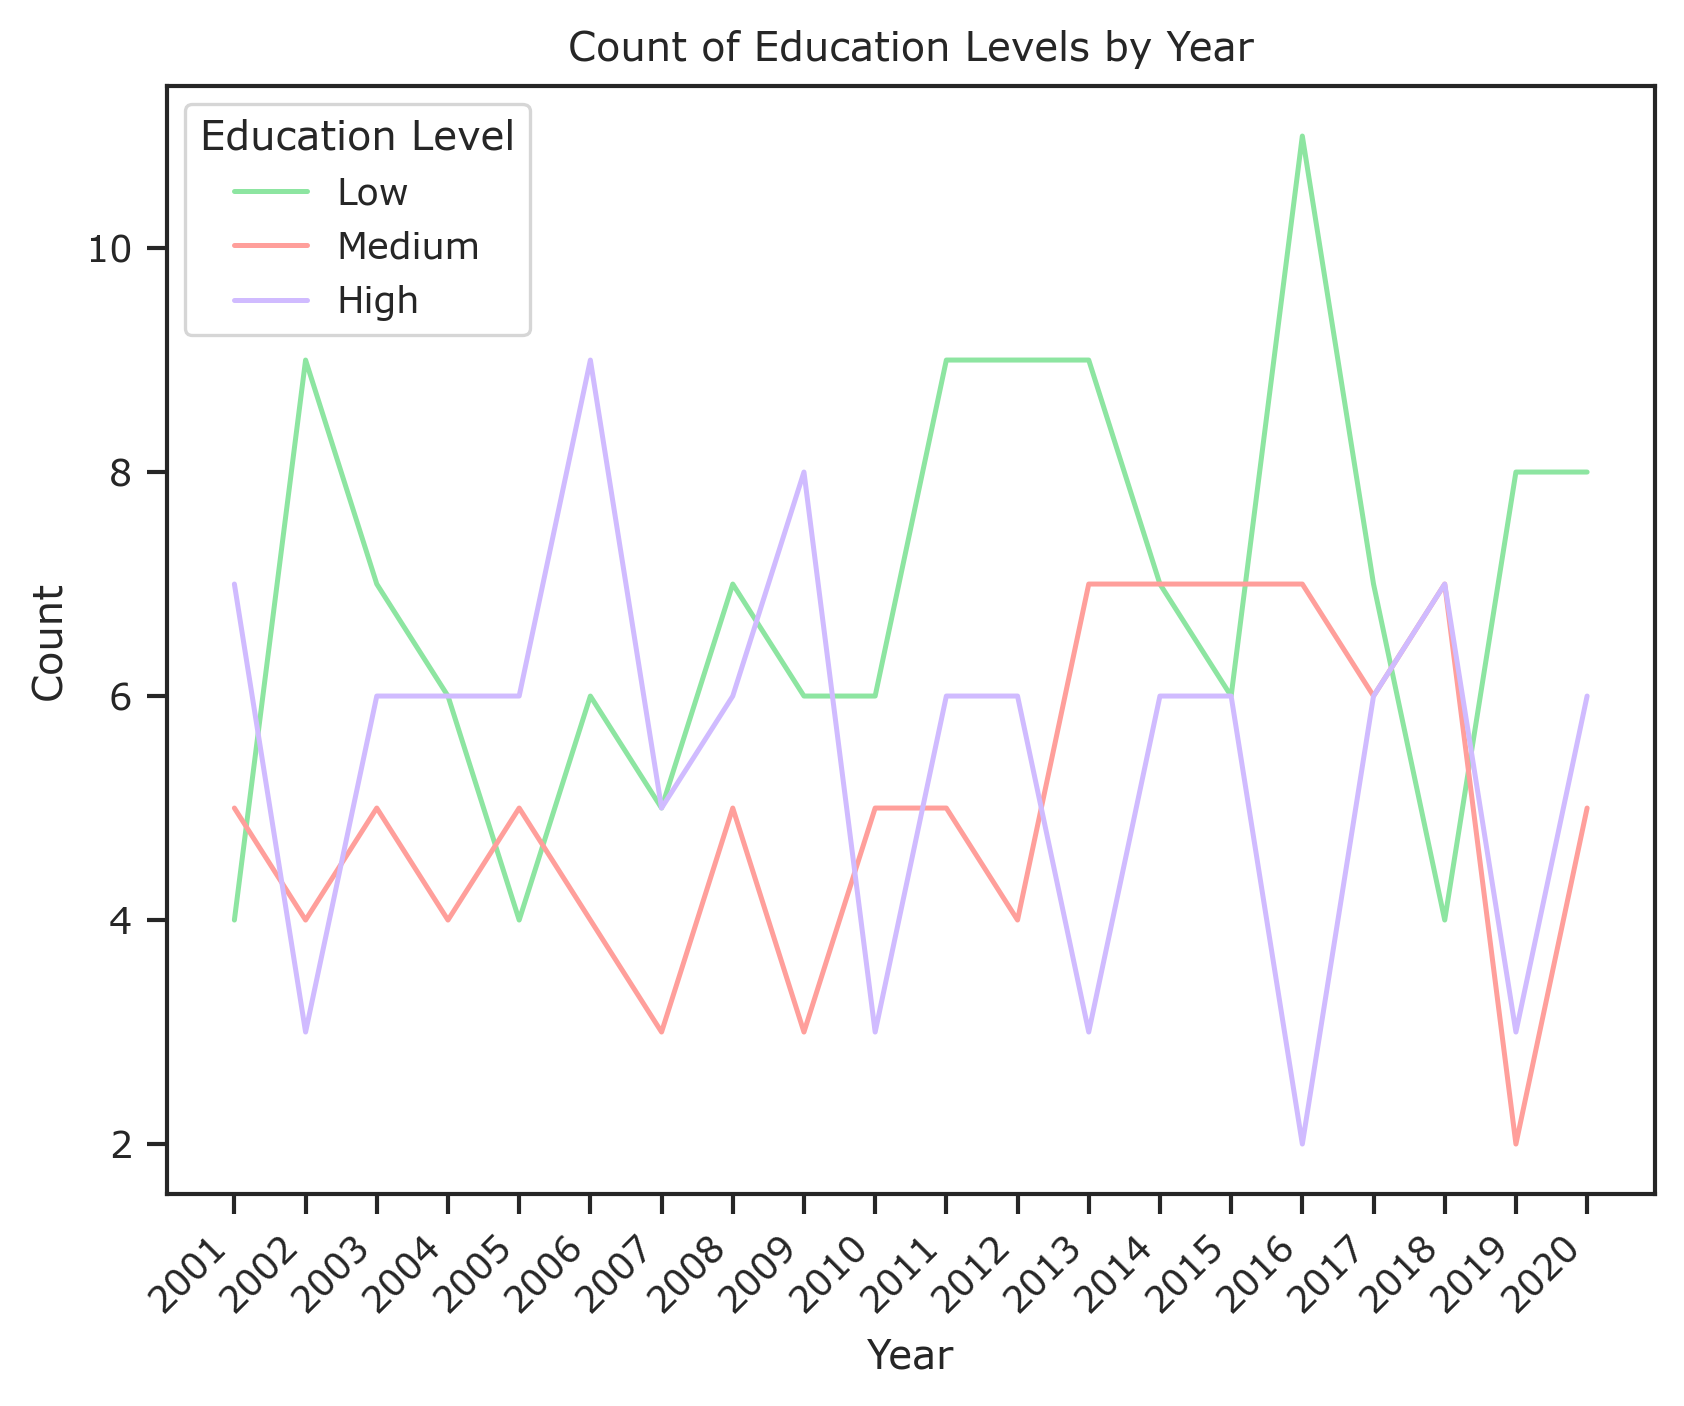

In [242]:
pivot_df = df.pivot_table(
    index="year",
    columns="education_level",
    values="country",
    aggfunc="size",
    fill_value=0,
)

pivot_df[["Low", "Medium", "High"]].plot(kind="line")

plt.title("Count of Education Levels by Year")

plt.xlabel("Year")
plt.xticks(avg_health_expenditure_yearly["year"], rotation=45, ha="right")
plt.ylabel("Count")

plt.legend(title="Education Level")

plt.show()